<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/20220529_smoke_%ED%95%98%EB%8A%94%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3. 첨부된 ‘smoke’ 데이터는 2018년도성인의건강검진데이터입니다.
## 3-1. 수축기혈압과이완기혈압기값의차이로새로운컬럼( 혈압차 )을생성하고, 연령대코드별각그룹중 혈압차의분산이 5번째로큰연 령대코드를구하세요.
## 3-2. 허리둘레를신장으로나눈값으로새로운컬럼( WHtR )을생성하고, 아래의표에따라비만인남성과여성의비율을구하세요.
----------------------------------------------------------------------------

# 1. 라이브러리 및 데이터 로드

In [ ]:
install.packages(c("tidymodels","tidyverse","lubridate","skimr","magrittr","data.table","gridExtra","ggplot2","pacman","esquissee"))
pacman::p_load("tidymodels","tidyverse","lubridate","skimr","magrittr","data.table","gridExtra","pacman","esquissee")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘esquissee’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘esquissee’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“'BiocManager' not available.  Could not check Bioconductor.

Please use `install.packages('BiocManager')` and then retry.”
Warning message in p_install(package, character.only = TRUE, ...):
“”
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there 

In [ ]:
system("gdown --id 104TbF95WISgGsBnJGXoGH2iMp3rheNso")

In [ ]:
df=read.csv("smoke.csv")

In [ ]:
df%>%str()

'data.frame':	44553 obs. of  26 variables:
 $ gender                  : chr  "F" "M" "F" "M" ...
 $ age                     : int  55 40 55 40 40 30 55 40 25 35 ...
 $ height                  : int  145 180 150 170 155 175 165 160 175 165 ...
 $ weight                  : int  55 55 50 85 45 65 70 55 80 85 ...
 $ waist                   : num  73 74 72 89 62 ...
 $ eyesight_left           : num  0.7 1.5 1 1 0.5 1 1.2 1.5 0.9 1.5 ...
 $ eyesight_right          : num  0.5 1.5 0.2 0.8 1 1 1 1.5 0.9 1.2 ...
 $ hearing_left            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hearing_right           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ systolic_blood_pressure : int  129 102 116 124 127 100 118 127 128 124 ...
 $ diastolic_blood_pressure: int  84 70 72 80 85 80 80 75 70 78 ...
 $ pre_meal_blood_sugar    : int  93 95 86 96 93 94 103 90 73 97 ...
 $ total_cholesterol       : int  185 176 168 231 261 169 153 176 179 201 ...
 $ triglyceride            : int  50 60 49 240 94 114 147 154 91 370 ...
 $ hdl_cho

In [ ]:
df %>% mutate(blood_pressure_difference=systolic_blood_pressure - diastolic_blood_pressure) %>%
        group_by(age) %>%
        summarise(var_blood_pressure_difference=var(blood_pressure_difference)) %>%
        arrange(-var_blood_pressure_difference) 
        #filter

age,var_blood_pressure_difference
<int>,<dbl>
80,154.53725
70,115.99971
75,115.47162
65,99.63538
60,94.38692
85,86.26374
55,79.29418
45,71.44508
50,71.20753


허리둘레를신장으로나눈값으로새로운컬럼( WHtR )을생성하고, 아래의표에따라비만인남성과여성의비율을구하세요.

In [ ]:
#WHtR 컬럼생성
df_mutate<- df %>% mutate(WHtR=waist/height)

In [ ]:
df_mutate_F<- df_mutate %>% filter(gender=="F")
df_mutate_M<-df_mutate %>% filter(gender=="M")

In [ ]:
df_mutate_F_WHtR<- df_mutate_F %>% mutate(WHtR_new= case_when(WHtR <=0.34~               'Extremely slim', 
                                           WHtR >=0.35 & WHtR <=0.41~ 'Slim',
                                           WHtR >=0.42 & WHtR <=0.48~ 'Healthy',
                                           WHtR >=0.49 & WHtR <=0.53~ 'Overweight',
                                           WHtR >=0.54 & WHtR <=0.57~ 'Very overweight',
                                           WHtR>=0.58~ 'Obese' ) ) 

In [ ]:
df_mutate_F_WHtR$ WHtR_new %>% table  %>%prop.table *100

.
 Extremely slim         Healthy           Obese      Overweight            Slim 
    0.007303535    41.162722758    10.736196319    29.111890155     6.047326906 
Very overweight 
   12.934560327 

- 여자 비만률 10.74%

In [ ]:
tb<-df_mutate_F_WHtR$ WHtR_new %>% table  %>%prop.table *100 

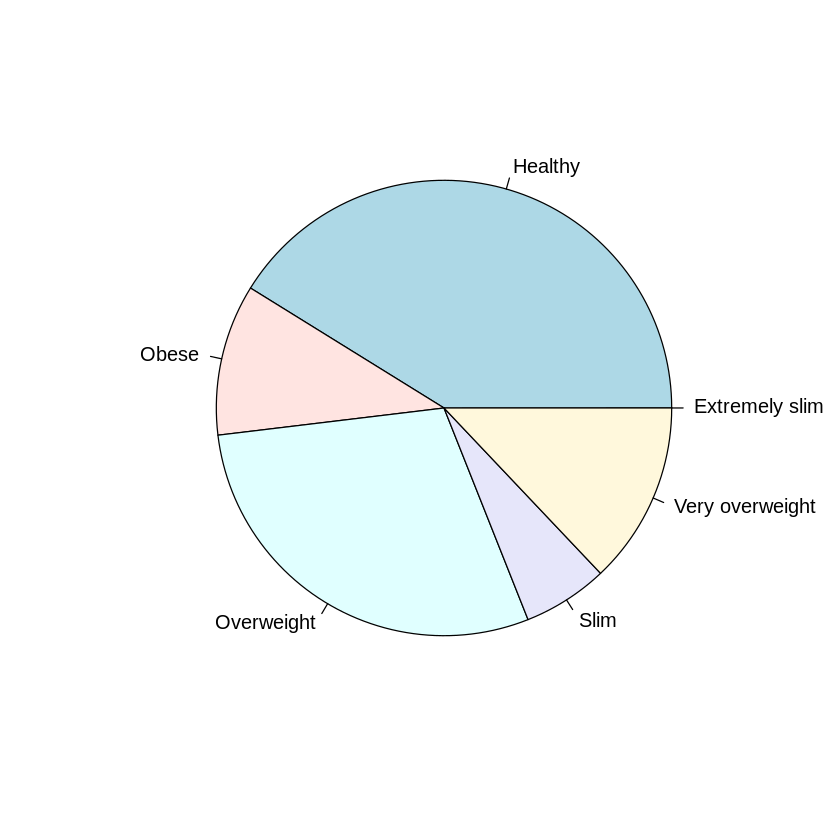

In [ ]:
pie(tb)

In [ ]:
#남자
df_mutate_M_WHtR<- df_mutate_M %>% mutate(WHtR_new= case_when(WHtR <=0.34~               'Extremely slim', 
                                           WHtR >=0.35 & WHtR <=0.42~ 'Slim',
                                           WHtR >=0.43 & WHtR <=0.52~ 'Healthy',
                                           WHtR >=0.53 & WHtR <=0.57~ 'Overweight',
                                           WHtR >=0.58 & WHtR <=0.62~ 'Very overweight',
                                           WHtR>=0.63~ 'Obese' ) ) 
df_mutate_M_WHtR$ WHtR_new %>% table  %>%prop.table *100

.
 Extremely slim         Healthy           Obese      Overweight            Slim 
    0.004014291    68.921360042     1.128015736    19.967082815     4.656577416 
Very overweight 
    5.322949701 

- 남자 비만율 1.13%  

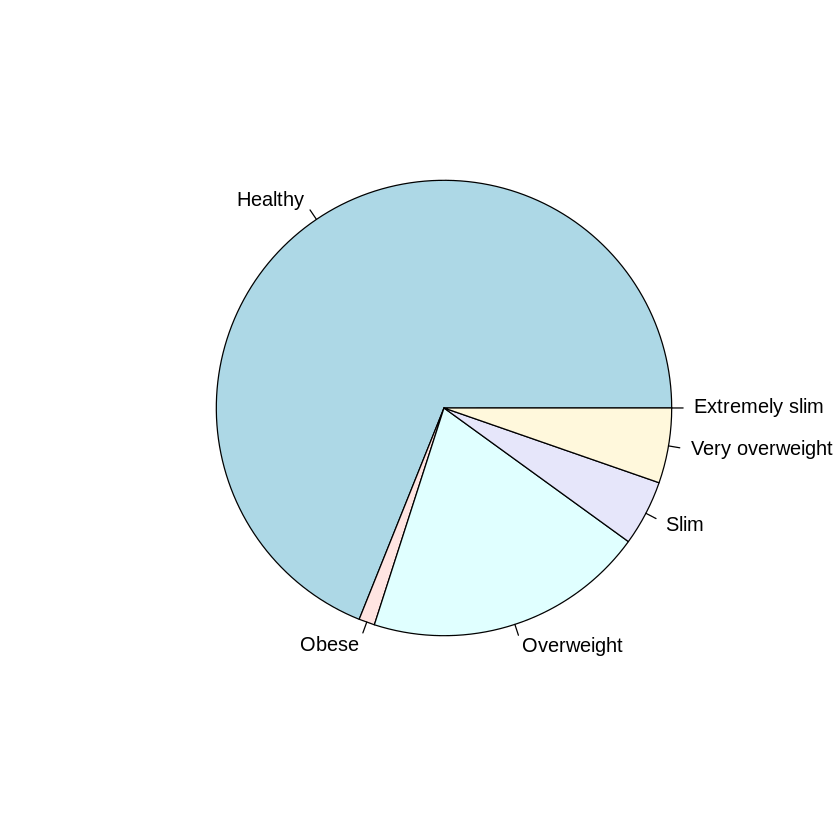

In [ ]:
tb_M<-df_mutate_M_WHtR$ WHtR_new %>% table  %>%prop.table *100 
pie(tb_M)

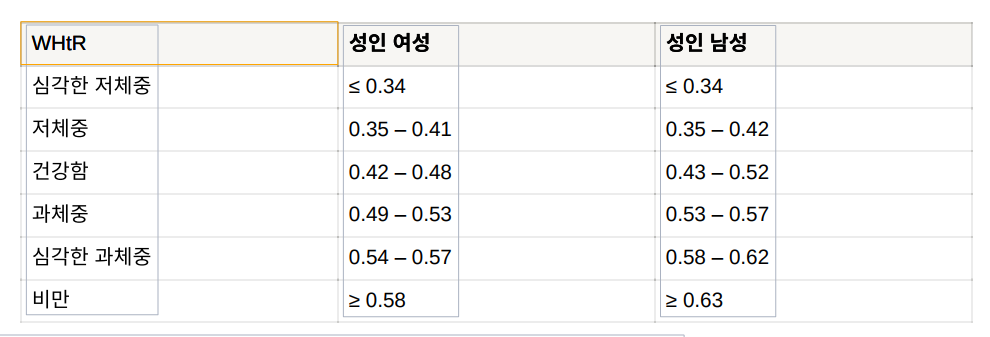

# 1. **전처리가 완료된 ‘smoke’ 데이터를 활용하여 흡연상태를 예측하는 모델을 만드세요.** 
    - `연속형 피처` min-max scaling
    - `범주형 피처` ’fastDummies’ 패키지 활용한 원핫인코딩
    - `타겟`  흡연상태 (1:흡연, 0:비흡연 )
    - `시드 넘버` 2022
    - `트레인-테스트 비율` 7:3

In [ ]:
str(df)

'data.frame':	44553 obs. of  26 variables:
 $ gender                  : chr  "F" "M" "F" "M" ...
 $ age                     : int  55 40 55 40 40 30 55 40 25 35 ...
 $ height                  : int  145 180 150 170 155 175 165 160 175 165 ...
 $ weight                  : int  55 55 50 85 45 65 70 55 80 85 ...
 $ waist                   : num  73 74 72 89 62 ...
 $ eyesight_left           : num  0.7 1.5 1 1 0.5 1 1.2 1.5 0.9 1.5 ...
 $ eyesight_right          : num  0.5 1.5 0.2 0.8 1 1 1 1.5 0.9 1.2 ...
 $ hearing_left            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hearing_right           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ systolic_blood_pressure : int  129 102 116 124 127 100 118 127 128 124 ...
 $ diastolic_blood_pressure: int  84 70 72 80 85 80 80 75 70 78 ...
 $ pre_meal_blood_sugar    : int  93 95 86 96 93 94 103 90 73 97 ...
 $ total_cholesterol       : int  185 176 168 231 261 169 153 176 179 201 ...
 $ triglyceride            : int  50 60 49 240 94 114 147 154 91 370 ...
 $ hdl_cho

In [ ]:
#변수추가해줌
df %<>% mutate(WHtR=waist/height)

In [ ]:
# 원핫인코딩
install.packages("fastDummies")
library(fastDummies)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
df<-dummy_cols(.data= df   , select_columns=c("gender","oral_examination","dental_floss") , remove_first_dummy=  FALSE, remove_selected_columns=TRUE )

In [ ]:
summary(df)

'data.frame':	44553 obs. of  29 variables:
 $ age                     : int  55 40 55 40 40 30 55 40 25 35 ...
 $ height                  : int  145 180 150 170 155 175 165 160 175 165 ...
 $ weight                  : int  55 55 50 85 45 65 70 55 80 85 ...
 $ waist                   : num  73 74 72 89 62 ...
 $ eyesight_left           : num  0.7 1.5 1 1 0.5 1 1.2 1.5 0.9 1.5 ...
 $ eyesight_right          : num  0.5 1.5 0.2 0.8 1 1 1 1.5 0.9 1.2 ...
 $ hearing_left            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hearing_right           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ systolic_blood_pressure : int  129 102 116 124 127 100 118 127 128 124 ...
 $ diastolic_blood_pressure: int  84 70 72 80 85 80 80 75 70 78 ...
 $ pre_meal_blood_sugar    : int  93 95 86 96 93 94 103 90 73 97 ...
 $ total_cholesterol       : int  185 176 168 231 261 169 153 176 179 201 ...
 $ triglyceride            : int  50 60 49 240 94 114 147 154 91 370 ...
 $ hdl_cholesterol         : int  98 53 53 54 71 45 41 40 80 40 

      age            height          weight           waist       
 Min.   :20.00   Min.   :130.0   Min.   : 30.00   Min.   : 51.00  
 1st Qu.:40.00   1st Qu.:160.0   1st Qu.: 55.00   1st Qu.: 76.00  
 Median :40.00   Median :165.0   Median : 65.00   Median : 82.00  
 Mean   :44.21   Mean   :164.7   Mean   : 65.88   Mean   : 82.08  
 3rd Qu.:55.00   3rd Qu.:170.0   3rd Qu.: 75.00   3rd Qu.: 88.00  
 Max.   :85.00   Max.   :190.0   Max.   :135.00   Max.   :129.00  
 eyesight_left   eyesight_right   hearing_left   hearing_right  
 Min.   :0.100   Min.   :0.100   Min.   :1.000   Min.   :1.000  
 1st Qu.:0.800   1st Qu.:0.800   1st Qu.:1.000   1st Qu.:1.000  
 Median :1.000   Median :1.000   Median :1.000   Median :1.000  
 Mean   :1.012   Mean   :1.008   Mean   :1.026   Mean   :1.026  
 3rd Qu.:1.200   3rd Qu.:1.200   3rd Qu.:1.000   3rd Qu.:1.000  
 Max.   :9.900   Max.   :9.900   Max.   :2.000   Max.   :2.000  
 systolic_blood_pressure diastolic_blood_pressure pre_meal_blood_sugar
 Min.

- oral_examination_Y변수 제외함, 다1임

In [ ]:
df=df[,-27]

In [ ]:
#스케일링
min_max_norm= function(x){
  x-min(x)/ (max(x)-min(x))
}

In [ ]:
df %<>% mutate(across(where(is.numeric), ~ min_max_norm(.x)))

In [ ]:
df %>%head()

,age,height,weight,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic_blood_pressure,diastolic_blood_pressure,⋯,ast,alt,gamma_gtp,smoke,dental_caries,WHtR,gender_F,gender_M,dental_floss_N,dental_floss_Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,54.69231,142.8333,54.71429,72.34615,0.6897959,0.4897959,0,0,128.57988,83.62264,⋯,171.9954,208.99966,14.998998,0,0,-0.1614800,1,0,0,1
2,39.69231,177.8333,54.71429,73.34615,1.4897959,1.4897959,0,0,101.57988,69.62264,⋯,29.9954,18.99966,22.998998,1,0,-0.2538172,0,1,0,1
3,54.69231,147.8333,49.71429,71.34615,0.9897959,0.1897959,0,0,115.57988,71.62264,⋯,30.9954,18.99966,9.998998,0,0,-0.1849283,1,0,1,0
4,39.69231,167.8333,84.71429,88.34615,0.9897959,0.7897959,0,0,123.57988,79.62264,⋯,25.9954,37.99966,107.998998,1,1,-0.1413989,0,1,0,1
5,39.69231,152.8333,44.71429,61.34615,0.4897959,0.9897959,0,0,126.57988,84.62264,⋯,19.9954,10.99966,12.998998,0,0,-0.2649283,1,0,1,0
6,29.69231,172.8333,64.71429,74.34615,0.9897959,0.9897959,0,0,99.57988,79.62264,⋯,15.9954,17.99966,13.998998,1,0,-0.2363569,0,1,0,1


## 4-1 svm, xgboost, randomforest 3개 알고리즘의 공통점을 쓰고, 예측 분석에 적합한 알고리즘인지 설명하세요.
1. 분류, 회귀 문제 둘 다에 적용할 수 있다.
2. 비선형 기법이다.
3. 비교적 복잡하므로 선형회귀에 비해 설명력이 떨어진다.
4. 앙상블이나 스택하여 개선할 수 있다.
5. 그러므로 본 데이터의 분류 예측 분석에 적합하다고 할 수 있다.


## 4-2 위의 3가지 방법으로 모두 모델링 해보세요. 그리고 가장 적합한 알고리즘 선택하고 이유를 설명하세요. 절차는 아래와 같습니다.
- XGBoost 모델 선택했다고 가정함
0. 선택한 이유: 
  - 규제로 인한 과적합 방지가능
  - 속도 빠름. 랜포는 부스트랩으로 트리 생성하고 "동시에" 생성하기 때문에 속도가 느리나 부스팅모델은 병렬적으로 노드를 생성함
  - 유연성: 로스펑션을 커스터마이징 할 수 있음
  - NA를 자동으로 처리함
  - Post pruning: MAX DEPTH까지 미리 생성한 후 반대로 돌아오면서 가지치기 함 -> 미래에 있을 정보획득량(IG)찾음
1. 한계점
- 다양한 파라미터가 존재하기 떄문에 파라미터 튜닝에 따라 모델의 성능이 크게 변함

2. 보완 가능한 부분
- 앙상블하거나 스태킹하여 모델을 개선시킬 수 있다.
3. 현업에서 사용시 주의할 점
- 과적합주의
- 예측 성능은 좋지만 설명력 떨어짐
